In [1]:
# Import all Modules for data manupulation
%matplotlib inline

import pandas as po
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import math

from sklearn.preprocessing import Imputer

In [2]:
# Import the data
path = os.getcwd()

raw_data = po.read_csv(path + '/data/airlinedelaycauses_DelayedFlights.csv')

raw_data.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
Unnamed: 0           int64
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               float64
TaxiOut              float64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtypes: float64(14), int64(11), object(5)
me

In [4]:
# Function that convert the 'HHMM' string to datetime.time
def format_heure(chaine):
    if po.isnull(chaine):
        return np.nan
    else:
        if chaine == 2400: chaine = 0
        chaine = "{0:04d}".format(int(chaine))
        heure = datetime.time(int(chaine[0:2]), int(chaine[2:4]))
        return heure

raw_data['Scheduled_Departure'] = raw_data['CRSDepTime'].apply(format_heure)
raw_data['Actual_Departure'] = raw_data['DepTime'].apply(format_heure)
raw_data['Actual_Arrival'] = raw_data['ArrTime'].apply(format_heure)
raw_data['Scheduled_Arrival'] = raw_data['CRSArrTime'].apply(format_heure)

raw_data[:5]

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Scheduled_Departure,Actual_Departure,Actual_Arrival,Scheduled_Arrival
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,0,NaN,NaN,NaN,NaN,NaN,19:55:00,20:03:00,22:11:00,22:25:00
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,0,NaN,NaN,NaN,NaN,NaN,07:35:00,07:54:00,10:02:00,10:00:00
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,0,NaN,NaN,NaN,NaN,NaN,06:20:00,06:28:00,08:04:00,07:50:00
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,0,2.0,0.0,0.0,0.0,32.0,17:55:00,18:29:00,19:59:00,19:25:00
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,0,NaN,NaN,NaN,NaN,NaN,19:15:00,19:40:00,21:21:00,21:10:00


### Treat Missing Value

In [5]:
# Missing value interpretation
missing_df = raw_data.isnull().sum(axis=0).reset_index() 
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)']=(raw_data.shape[0]-missing_df['missing values'])/raw_data.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop = True)

,variable,missing values,filling factor (%)
0,LateAircraftDelay,689270,64.411145
1,SecurityDelay,689270,64.411145
2,NASDelay,689270,64.411145
3,WeatherDelay,689270,64.411145
4,CarrierDelay,689270,64.411145
5,ArrDelay,8387,99.566957
6,ActualElapsedTime,8387,99.566957
7,AirTime,8387,99.566957
8,TaxiIn,7110,99.632892
9,Actual_Arrival,7110,99.632892


In [6]:
# Replacing null values in Delay to 0
raw_data = raw_data[raw_data.ArrDelay.notnull()]
raw_data['ArrDelay'].unique()

array([  -14.,     2.,    14., ...,   880.,  1279.,   991.])

In [7]:
raw_data[['LateAircraftDelay', 'SecurityDelay','NASDelay','WeatherDelay','CarrierDelay']] = raw_data[['LateAircraftDelay', 'SecurityDelay','NASDelay','WeatherDelay','CarrierDelay']].fillna(value=0)

In [8]:
# Create numerical values for time based on linear progression
raw_data['Weekend'] = np.where(raw_data['DayOfWeek']>5, 1, 0)

raw_data['Actual_Dep_Hr'] = np.floor(raw_data['DepTime']/100)
raw_data['Actual_Dep_Min'] = ((raw_data['DepTime']/100) - raw_data['Actual_Dep_Hr'])*100
raw_data['Actual_Dep_MinBuc'] = np.ceil(raw_data['Actual_Dep_Min']/15)

raw_data['Sch_Dep_Hr'] = np.floor(raw_data['CRSDepTime']/100)
raw_data['Sec_Dep_Min'] = ((raw_data['CRSDepTime']/100) - raw_data['Sch_Dep_Hr'])*100
raw_data['Sec_Dep_MinBuc'] = np.ceil(raw_data['Sec_Dep_Min']/15)

raw_data['Actual_Arr_Hr'] = np.floor(raw_data['ArrTime']/100)
raw_data['Actual_Arr_Min'] = ((raw_data['ArrTime']/100) - raw_data['Actual_Arr_Hr'])*100
raw_data['Actual_Arr_MinBuc'] = np.ceil(raw_data['Actual_Arr_Min']/15)

raw_data['Sch_Arr_Hr'] = np.floor(raw_data['CRSArrTime']/100)
raw_data['Sec_Arr_Min'] = ((raw_data['CRSArrTime']/100) - raw_data['Sch_Arr_Hr'])*100
raw_data['Sec_Arr_MinBuc'] = np.ceil(raw_data['Sec_Arr_Min']/15)

In [9]:
df = raw_data.drop(['DepTime','CRSDepTime','ArrTime','CRSArrTime','Unnamed: 0','CRSElapsedTime','ArrDelay',
                    'Year','FlightNum','TailNum','CancellationCode','TaxiOut', 'TaxiIn'], axis = 1)
df[:5]

,Month,DayofMonth,DayOfWeek,UniqueCarrier,ActualElapsedTime,AirTime,DepDelay,Origin,Dest,Distance,...,Actual_Dep_MinBuc,Sch_Dep_Hr,Sec_Dep_Min,Sec_Dep_MinBuc,Actual_Arr_Hr,Actual_Arr_Min,Actual_Arr_MinBuc,Sch_Arr_Hr,Sec_Arr_Min,Sec_Arr_MinBuc
0,1,3,4,WN,128.0,116.0,8.0,IAD,TPA,810,...,1.0,19.0,55.0,4.0,22.0,11.0,1.0,22.0,25.0,2.0
1,1,3,4,WN,128.0,113.0,19.0,IAD,TPA,810,...,4.0,7.0,35.0,3.0,10.0,2.0,1.0,10.0,0.0,0.0
2,1,3,4,WN,96.0,76.0,8.0,IND,BWI,515,...,2.0,6.0,20.0,2.0,8.0,4.0,1.0,7.0,50.0,4.0
3,1,3,4,WN,90.0,77.0,34.0,IND,BWI,515,...,2.0,17.0,55.0,4.0,19.0,59.0,4.0,19.0,25.0,2.0
4,1,3,4,WN,101.0,87.0,25.0,IND,JAX,688,...,3.0,19.0,15.0,1.0,21.0,21.0,2.0,21.0,10.0,1.0


In [10]:
# Transforming Categorical datapoint after examining
print(df['UniqueCarrier'].value_counts())
print("_"*40)
print(df['Origin'].value_counts())

WN    376201
AA    190910
MQ    141223
UA    140904
OO    131780
DL    113728
XE    103147
CO     99731
US     98007
EV     81762
NW     78843
FL     70969
YV     66769
B6     54925
OH     52453
9E     51569
AS     39010
F9     28224
HA      7472
AQ       744
Name: UniqueCarrier, dtype: int64
________________________________________
ATL    131213
ORD    125451
DFW     95058
DEN     74033
LAX     58545
IAH     56571
PHX     55506
LAS     53536
EWR     52756
DTW     43721
SFO     43635
MCO     35959
CLT     34942
JFK     34477
MSP     32293
LGA     31062
SEA     30928
BWI     30604
PHL     30188
MDW     29121
SLC     28501
BOS     28024
SAN     24737
CVG     23785
MIA     23176
IAD     22040
TPA     20113
HOU     19575
FLL     19255
DAL     18645
        ...  
LWS        86
SLE        85
SCE        82
LYH        81
AKN        70
DLG        65
CDC        64
BTM        58
YKM        55
ADK        53
TEX        52
LWB        48
GST        40
CMX        34
RHI        33
RFD        33
ALO    

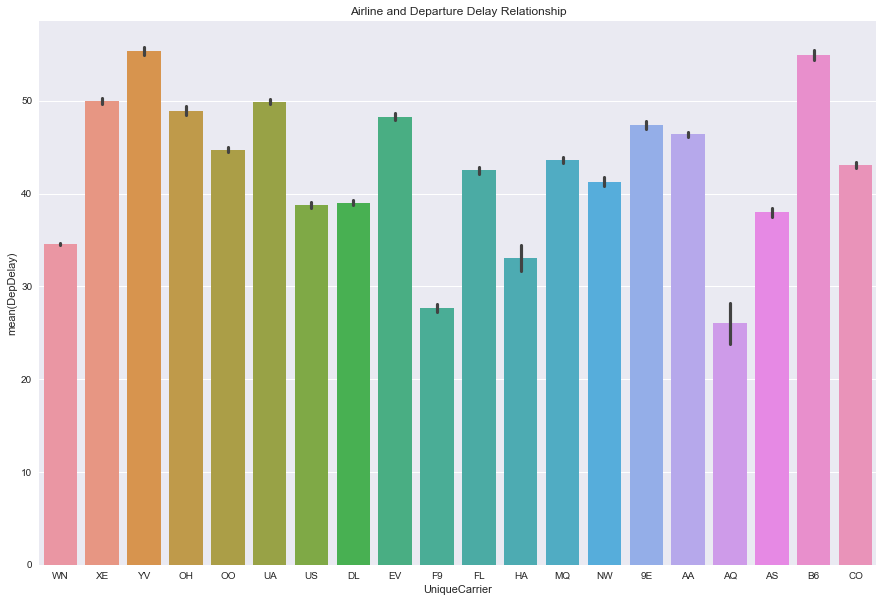

In [11]:
fig, ax = plt.subplots(figsize=(15,10))

sns.barplot(x = 'UniqueCarrier', y = 'DepDelay', data=df, ax = ax)
ax.set_title('Airline and Departure Delay Relationship')

In [12]:
def stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}

Orign = df['DepDelay'].groupby(df['Origin']).apply(stats).unstack()
Orign = Orign.sort_values('max')
Orign

,count,max,mean,min
Origin,,,,
TUP,1.0,11.0,11.000000,11.0
INL,1.0,23.0,23.000000,23.0
PUB,2.0,45.0,27.000000,9.0
WYS,10.0,96.0,25.100000,6.0
PIR,3.0,99.0,38.000000,6.0
BLI,4.0,107.0,37.000000,11.0
DLG,65.0,120.0,31.923077,6.0
GST,40.0,125.0,25.075000,6.0
HTS,10.0,130.0,52.500000,10.0


### The minumum delay in flight is 6 minutes and max is 24 hours. No flights run without a 6 min delay which could be the delay between the CRS time and Actual Time

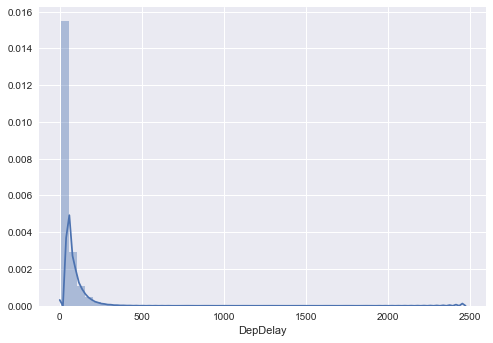

In [13]:
sns.distplot(df['DepDelay'])

In [14]:
# Normlaize data by dividing the subtracting the delay by 6 and keeping a cap delay to its 99 percentile

df['DepartureDelay'] = df['DepDelay'] - 6

p = df['DepartureDelay'].quantile([0.99])
df['Departure_Delay']= np.where(df['DepartureDelay'] > p[0.99], p[0.99],df['DepartureDelay'])
df = df.drop(['DepDelay','DepartureDelay'], axis =1)
df[:5]

,Month,DayofMonth,DayOfWeek,UniqueCarrier,ActualElapsedTime,AirTime,Origin,Dest,Distance,Cancelled,...,Sch_Dep_Hr,Sec_Dep_Min,Sec_Dep_MinBuc,Actual_Arr_Hr,Actual_Arr_Min,Actual_Arr_MinBuc,Sch_Arr_Hr,Sec_Arr_Min,Sec_Arr_MinBuc,Departure_Delay
0,1,3,4,WN,128.0,116.0,IAD,TPA,810,0,...,19.0,55.0,4.0,22.0,11.0,1.0,22.0,25.0,2.0,2.0
1,1,3,4,WN,128.0,113.0,IAD,TPA,810,0,...,7.0,35.0,3.0,10.0,2.0,1.0,10.0,0.0,0.0,13.0
2,1,3,4,WN,96.0,76.0,IND,BWI,515,0,...,6.0,20.0,2.0,8.0,4.0,1.0,7.0,50.0,4.0,2.0
3,1,3,4,WN,90.0,77.0,IND,BWI,515,0,...,17.0,55.0,4.0,19.0,59.0,4.0,19.0,25.0,2.0,28.0
4,1,3,4,WN,101.0,87.0,IND,JAX,688,0,...,19.0,15.0,1.0,21.0,21.0,2.0,21.0,10.0,1.0,19.0


In [15]:
df['Departure_Delay'].max()

243.0

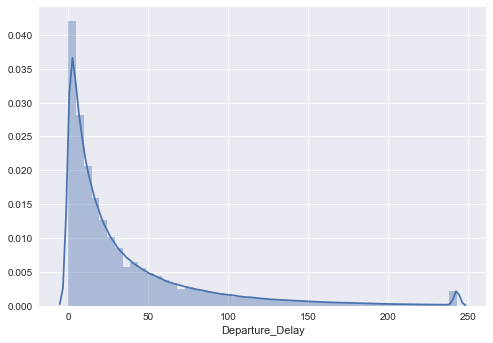

In [16]:
sns.distplot(df['Departure_Delay'])

In [17]:
# Calculate daily traffic

# Departure Airport Traffic
Departure = df.groupby(['Origin','Month','DayofMonth']).count()
Departure.add_suffix('Traffic').reset_index()
Depature_traffic = Departure.iloc[:,3]
df1 = po.DataFrame(Depature_traffic.reset_index())
df1.rename(columns={'AirTime': 'AirportTraffic'})

final_df = po.merge(df, df1, on = ['Origin','Month','DayofMonth'])
final_df.rename(columns={'AirTime_y': 'AirportTraffic'})




print("Merged Data Count")
print(final_df.Month.count())
print("_"*30)
print("Before Merge Data Count")
print(df.Month.count())

Merged Data Count
1928371
______________________________
Before Merge Data Count
1928371


In [18]:
# Clean Memory before going to into model building
del raw_data
del df
del df1

## Extract only those variables to be used in the futher feature engineering

In [26]:
input_data = final_df.copy()
input_data = input_data.drop(['ActualElapsedTime','AirTime_x','Scheduled_Departure','Actual_Departure','Actual_Arrival',
                             'Scheduled_Arrival'], axis = 1, inplace = False)

dummy_data = po.concat([input_data, po.get_dummies(input_data['Origin'],prefix = 'Origin_'),
                       po.get_dummies(input_data['Dest'],prefix = 'Dest_'),
                       po.get_dummies(input_data['UniqueCarrier'],prefix = 'Carrier_')], axis = 1)
dummy_data.rename(columns={'AirTime_y': 'AirportTraffic'})
dummy_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1928371 entries, 0 to 1928370
Columns: 654 entries, Month to Carrier__YV
dtypes: float64(18), int32(1), int64(7), object(3), uint8(625)
memory usage: 1.5+ GB


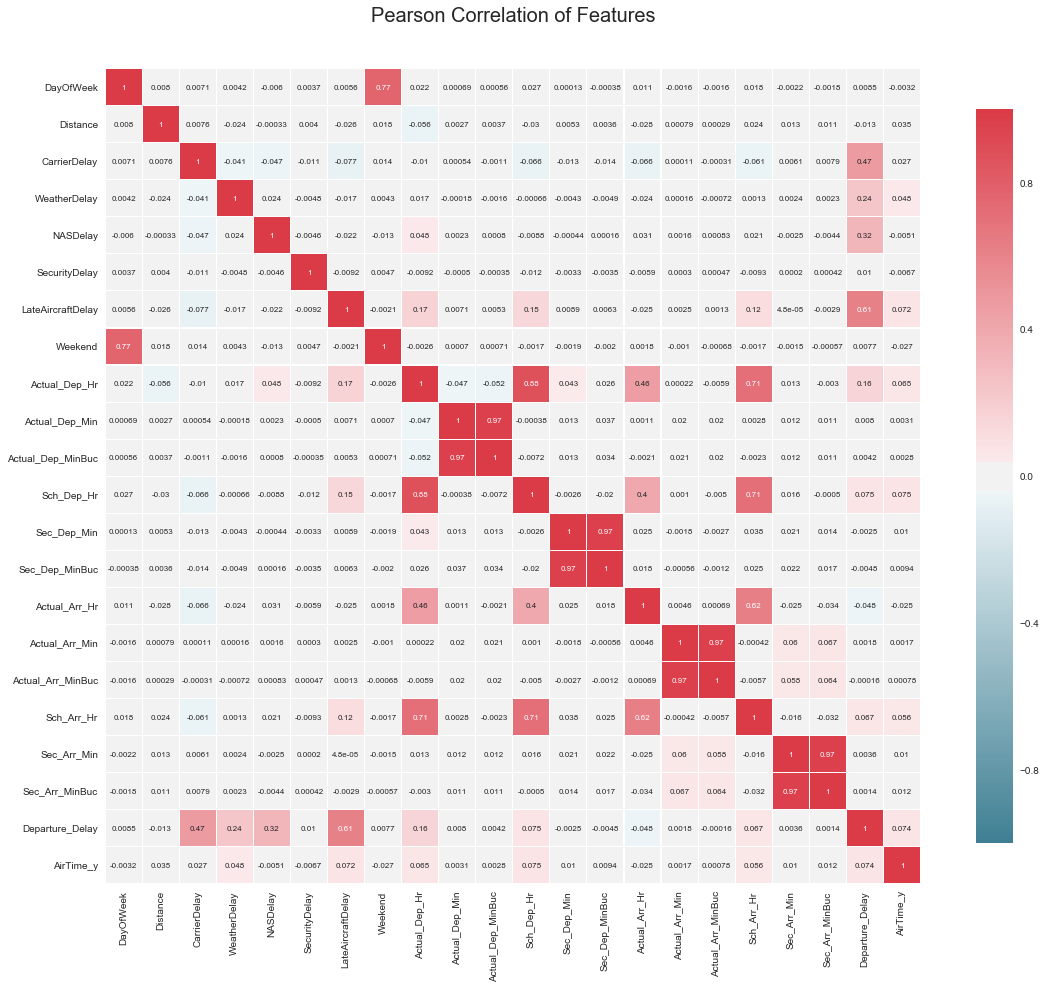

In [27]:
#correlation heatmap of dataset
non_cat = input_data.copy()
non_cat = non_cat.drop(['Origin','Dest','UniqueCarrier','Cancelled','Diverted','Month','DayofMonth'], axis = 1, inplace = False)

def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(20, 15))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':8 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=20)

correlation_heatmap(non_cat)

### Carrier Delay, Weather Delay, NAS Delay, Late Aircraft Delay, Departure Hour, Arrival Hour and Airport Traffic seems to highly correlated to Departure Delay

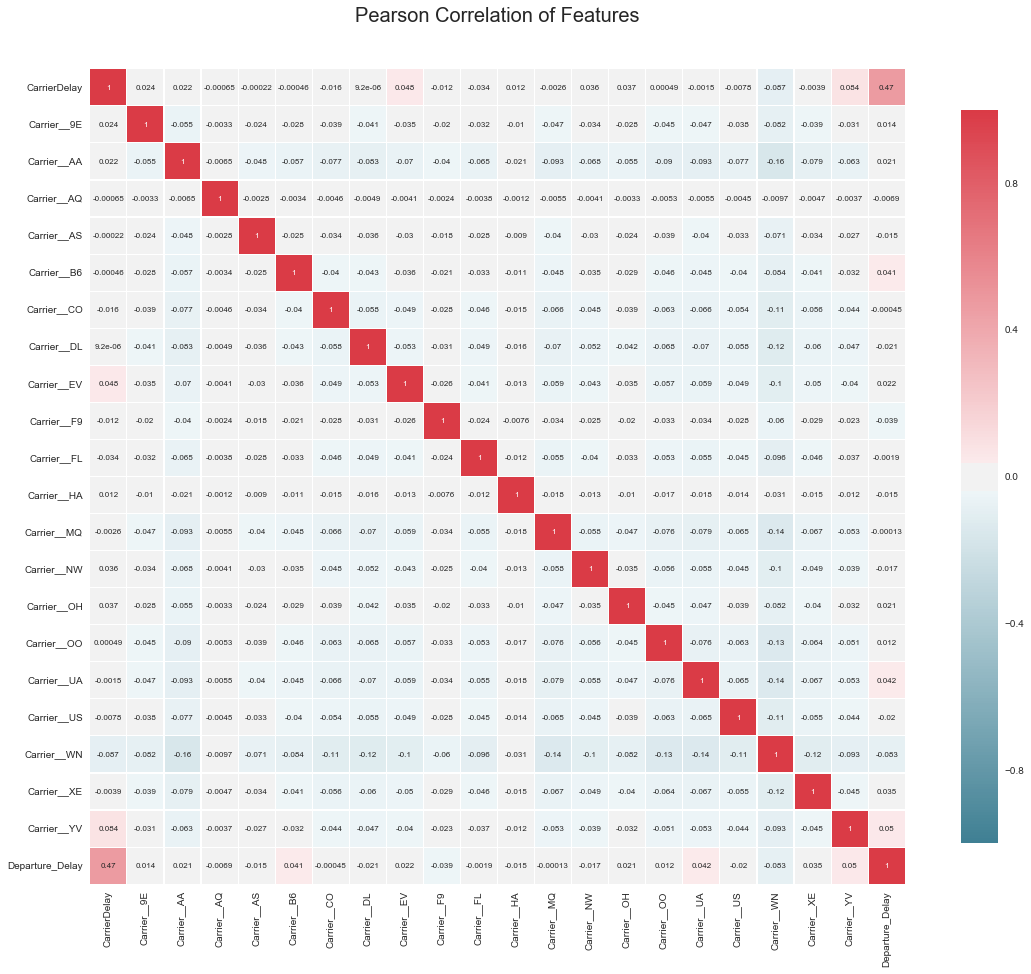

In [33]:
non_cat = dummy_data.copy()

non_cat = non_cat[non_cat.columns[po.Series(non_cat.columns).str.startswith('Carrier')]]
non_cat = po.concat([non_cat[non_cat.columns[po.Series(non_cat.columns).str.startswith('Carrier')]], 
                     input_data.loc[:,'Departure_Delay']], axis = 1)

correlation_heatmap(non_cat)

### Import Modelling Modules

In [35]:
# For Linear Models
import statsmodels.api as sm
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.kernel_ridge import KernelRidge

# For Tree Models
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

# For Model Transformation
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, RegressorMixin

# Cross Validation and Hyperparameter Tuning
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

In [42]:
# Split data into 30-70 split
def drop_var(data, drop_vars):
    temp = data.copy()
    temp = data.drop(drop_vars, axis = 1, inplace = False)
    return temp

def bootstrap_it(data, split):
    data['is_train'] = np.random.uniform(low=0, high=1, size=len(data)) < split
    data_train = data.loc[data['is_train'] == True]
    data_test = data.loc[data['is_train'] == False]
    del data_train['is_train']
    del data_test['is_train']
    print(data.shape)
    print(data_train.shape)
    print(data_test.shape)
    return data_train, data_test

input_data = drop_var(dummy_data, ['Sch_Dep_Hr','Sec_Dep_Min','Sec_Dep_MinBuc','Sch_Arr_Hr','Sec_Arr_Min',
                                   'Sec_Arr_MinBuc','DayOfWeek','Actual_Dep_Min','Actual_Arr_Min'])

train_data, test_data = bootstrap_it(input_data, 0.7)

(1928371, 646)
(1350430, 645)
(577941, 645)


In [47]:
# defining training data varaibles for Y and X
def train_test(data):
    xtemp = data.copy()
    xtemp = xtemp.drop('Departure_Delay', axis = 1)
    ytemp = data.copy()
    ytemp = ytemp.loc[:,'Departure_Delay']
    print(data.shape)
    print(xtemp.shape)
    print(ytemp.shape)
    return xtemp, ytemp

X_train, y_train = train_test(train_data)
X_test, y_test = train_test(test_data)

(1350430, 645)
(1350430, 644)
(1350430,)
(577941, 645)
(577941, 644)
(577941,)


In [49]:
ols = sm.OLS(y_train, X_train).fit()
print(ols.summary())

X_test['Predicted'] = model.predict(X_test)
mape = np.mean(np.abs(y_test['Scheduled_Delay']-X_test['Predicted'])/y_test['Scheduled_Delay'])
print(mape)

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [50]:
np.asarray(X_train)

array([[1, 3, 'WN', ..., 1, 0, 0],
       [1, 3, 'WN', ..., 1, 0, 0],
       [1, 3, 'XE', ..., 0, 1, 0],
       ..., 
       [12, 4, 'DL', ..., 0, 0, 0],
       [12, 8, 'DL', ..., 0, 0, 0],
       [12, 10, 'DL', ..., 0, 0, 0]], dtype=object)